# IMPORTS

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# UTILS

In [57]:
def split_training_validation(X, Y, validation_proportion=10):
    indices = [i for i in range(X.shape[0])] # Observations as rows of X
    np.random.shuffle(indices)
    split = int(X.shape[0] * validation_proportion / 100)
    train_indices, validation_indices = indices[:split], indices[split:]
    X_train, Y_train = X[train_indices], Y[train_indices]
    X_validation, Y_validation = X[validation_indices], Y[validation_indices]
    return X_train, Y_train, X_validation, Y_validation

def show_grid_images(images, title=''):
    """
    From a list of images,
    Plots all images along a kx5 grid.
    """
    nbr_images = images.shape[0]
    figsize_ref = 2
    rows, columns = int(nbr_images / 5), 5
    f = plt.figure(figsize=(figsize_ref*columns,figsize_ref*rows)) # 2 Columns, . Lines
    plt.axis('off')
    plt.title(title,  y=1.08) # Trick to offset the title.
    plt.subplots_adjust(wspace=-0.35, hspace=0)
    for index in range(nbr_images):
        image = images[index]
        ax = f.add_subplot(rows, columns, index + 1)
        ax.axis('off')
        ax.imshow(image, cmap=plt.cm.gray)
    
    plt.show()

# Loading Datasets

In [38]:
def load_dataset(dataset_name, path='./datasets/'):
    dataset = np.load(f'{path}{dataset_name}')
    X_train, Y_train = dataset['Xtr'], dataset['Str']
    X_test, Y_test = dataset['Xts'], dataset['Yts']
    
    return X_train, Y_train, X_test, Y_test

### ======================

In [46]:
MNIST_05_NAME = 'FashionMNIST0.5.npz'
MNIST_06_NAME = 'FashionMNIST0.6.npz'
CIFAR_NAME = 'CIFAR.npz'

mnist05_X_train, mnist05_Y_train, mnist05_X_test, mnist05_Y_test = load_dataset(MNIST_05_NAME)
print('Fashion MNIST 0.5 dataset, X_train shape: {}, X_test shape: {}, Classes in Y: {}'.format(mnist05_X_train.shape, mnist05_X_test.shape, set(mnist05_Y_train)))
mnist06_X_train, mnist06_Y_train, mnist06_X_test, mnist06_Y_test = load_dataset(MNIST_06_NAME)
print('Fashion MNIST 0.6 dataset, X_train shape: {}, X_test shape: {}, Classes in Y: {}'.format(mnist06_X_train.shape, mnist06_X_test.shape, set(mnist06_Y_train)))
cifar_X_train, cifar_Y_train, cifar_X_test, cifar_Y_test = load_dataset(CIFAR_NAME)
print('Fashion CIFAR dataset, X_train shape: {}, X_test shape: {}, Classes in Y: {}'.format(cifar_X_train.shape, cifar_X_test.shape, set(cifar_Y_train)))


Fashion MNIST 0.5 dataset, X_train shape: (18000, 28, 28), X_test shape: (3000, 28, 28), Classes in Y: {0, 1, 2}
Fashion MNIST 0.6 dataset, X_train shape: (18000, 28, 28), X_test shape: (3000, 28, 28), Classes in Y: {0, 1, 2}
Fashion CIFAR dataset, X_train shape: (15000, 32, 32, 3), X_test shape: (3000, 32, 32, 3), Classes in Y: {0, 1, 2}


##### Image Visualization

Associated Class: 1


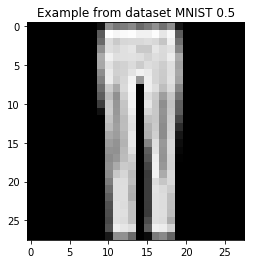

Associated Class: 1


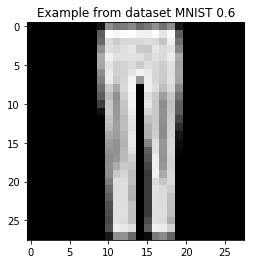

Associated Class: 0


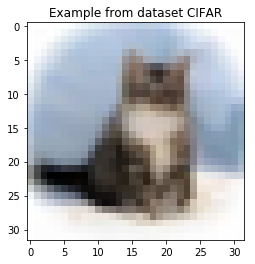

In [53]:
# Fashion MNIST 0.5
plt.figure()
plt.imshow(mnist05_X_train[66], cmap=plt.cm.gray)
plt.title('Example from dataset MNIST 0.5')
print(f'Associated Class: {mnist05_Y_train[66]}')
plt.show()

# Fashion MNIST 0.6
plt.figure()
plt.imshow(mnist06_X_train[66], cmap=plt.cm.gray)
plt.title('Example from dataset MNIST 0.6')
print(f'Associated Class: {mnist06_Y_train[66]}')
plt.show()

# Fashion CIFAR
plt.figure()
plt.imshow(cifar_X_train[66], cmap=plt.cm.gray)
plt.title('Example from dataset CIFAR')
print(f'Associated Class: {cifar_Y_train[66]}')
plt.show()

#### Evidence of Label Noise

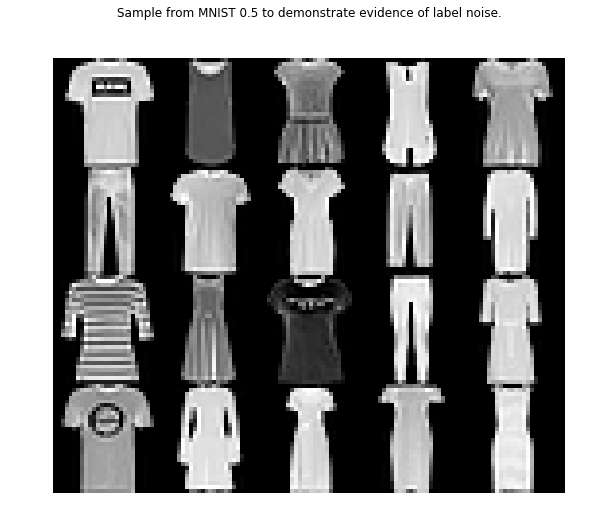

Associated Labels
[[2 1 2 1 2]
 [0 1 0 1 0]
 [1 1 1 2 2]
 [0 2 2 2 2]]


In [63]:
show_grid_images(mnist05_X_train[:20], 'Sample from MNIST 0.5 to demonstrate evidence of label noise.')
print('Associated Labels')
print(mnist05_Y_train[:20].reshape(-1,5))